In [211]:
#기계학습응용 9주차 과제
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [212]:
def load_image():
    import matplotlib.image as mpimg
    img = mpimg.imread('d:\mju\grade3\semester2\기계학습응용\과제\edge_detection_ex.jpg')  #이미지 로드
    plt.imshow(img)
    plt.axis('off')  #축 제거
    img = img.reshape(1, 720, 1280, 3)  #1개, 세로 720, 가로 1280, 채널 3(r, g, b)
    img = tf.constant(img, dtype = tf.float64)  #왜 하는지는 모르겠는데 하더라
    print("원본 이미지")
    plt.show()
    return img

In [213]:
def make_filter():
    weight = np.array([[-1, -2, -1],
                      [0, 0, 0],
                      [1, 2, 1]])  #윤곽선을 추출하기 위한 필터
    weight = np.concatenate([weight, weight, weight], axis = 0)  #3채널이기 때문에 같은 필터를 추가
    weight = weight.reshape(1, 3, 3, 3)  #1개, 가로 3, 세로 3, 채널 3
    weight_init = tf.constant_initializer(weight)  #왜 하는지는 모르겠는데 하더라
    return weight_init

In [214]:
def cnn_same(image, filter):
    conv2d = keras.layers.Conv2D(filters = 1, kernel_size = 3, padding = "SAME", kernel_initializer = filter)(image)
    #필터 1개, 필터크기 3x3, 이미지 크기 보존, 필터설정
    plt.imshow(conv2d.numpy().reshape(720, 1280), cmap = "gray")  #gray(작은 숫자가 검정)으로 이미지 그리기
    plt.axis('off')  #축 제거
    print("윤곽선을 추출한 이미지")
    plt.show()

In [215]:
def main():
    img = load_image()
    filter = make_filter()
    cnn_same(img, filter)

원본 이미지


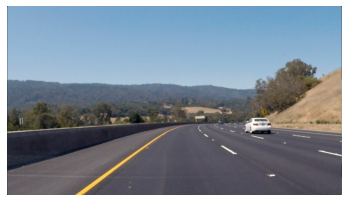

윤곽선을 추출한 이미지


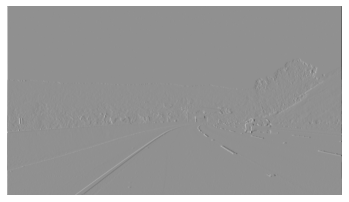

In [216]:
main()